In [20]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [21]:
# 2. Load the dataset
df = pd.read_csv('/Users/saswatranjannayak/Desktop/train.csv')  # replace with your file name

In [22]:
# 3. Basic Exploration
print("Basic Information:")
print(df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [23]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [24]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [25]:
# 4. Value Counts for Categorical Features
print("\nValue Counts:")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


Value Counts:

Name:
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Ticket:
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

Cabin:
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54  

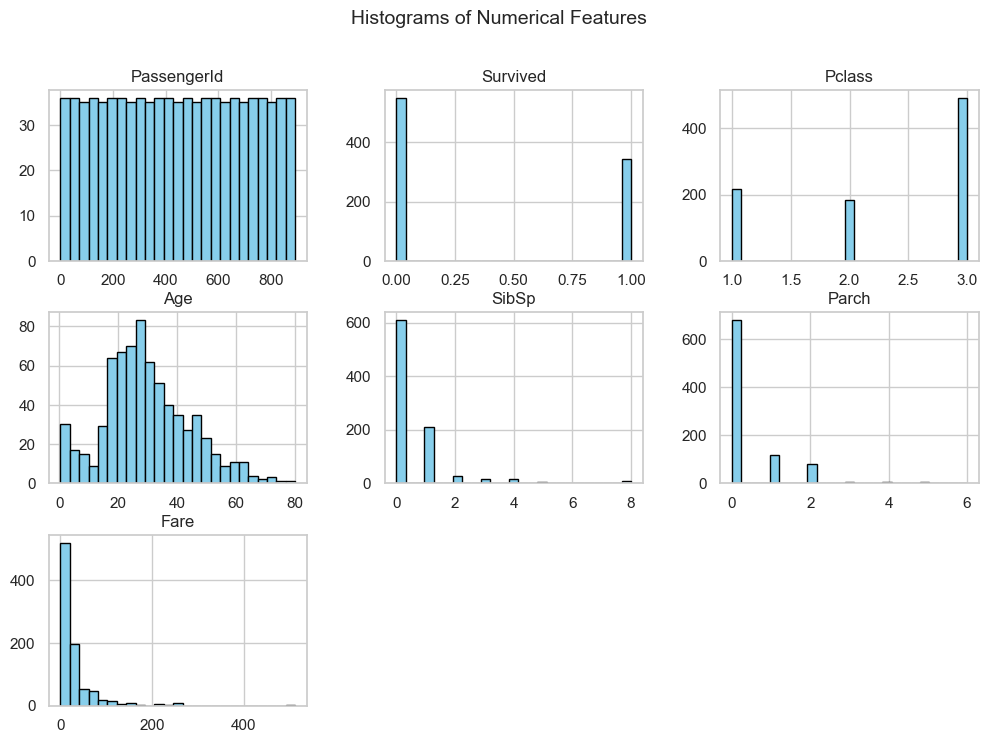

In [26]:
# 5.1 Histograms for Numerical Features
df.hist(figsize=(12, 8), bins=25, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=14)
plt.show()

### 1. Histograms of Numerical Features
- **PassengerId:** Uniformly distributed, indicating a sequential ID.
- **Survived:** Binary distribution with roughly 60% non-survivors (0) and 40% survivors (1).
- **Pclass:** Skewed with most passengers in 3rd class, followed by 1st and 2nd.
- **Age:** Right-skewed distribution with a peak around 20-30 years; ages span from 0-80 yrs with some younger children.
- **SibSp:** Most passengers have 0 siblings/spouse onboard; very few have high values (up to 8).
- **Parch:** Majority have 0 parents/children onboard; a few have up to 6.
- **Fare:** Highly right-skewed; most passengers paid low fares, but a small number paid very high fares (~500).

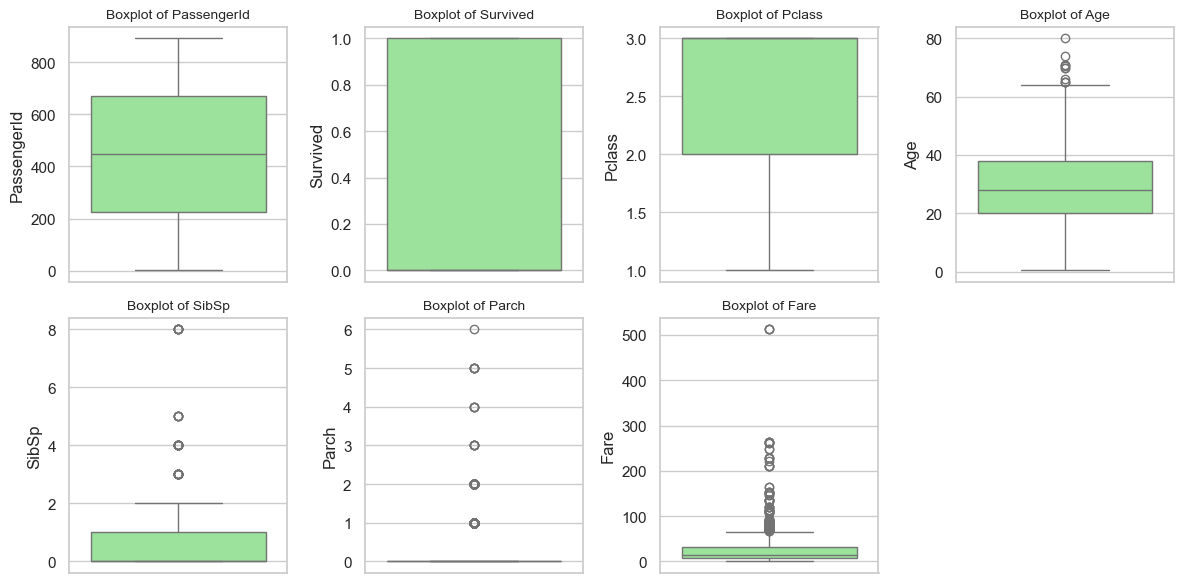

In [27]:
# 5.2 Boxplots
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, (len(numeric_cols) + 1) // 2, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}', fontsize=10)
plt.tight_layout()
plt.show()

### 2. Boxplots of Numerical Features
- **PassengerId:** Values span full range without outliers.
- **Survived:** Binary 0 or 1 as expected.
- **Pclass:** Categorical 1, 2, and 3 with no outliers.
- **Age:** Median age around late 20s to 30s; presence of some outliers above 70.
- **SibSp:** Most at 0; distinct outliers with high numbers (4-8).
- **Parch:** Few outliers above 3.
- **Fare:** Several outliers with very high fares, some above $200.

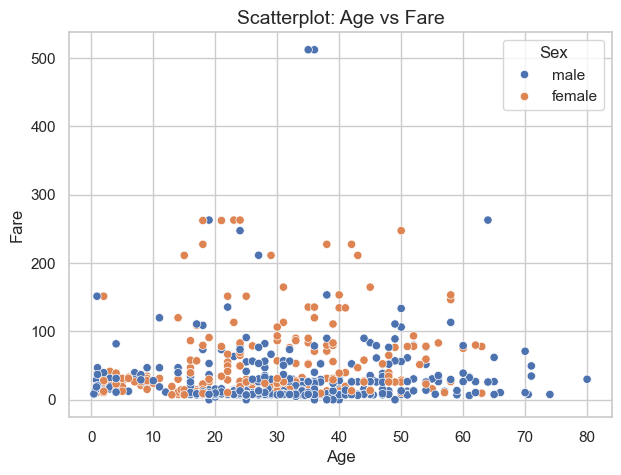

In [28]:
# 5.3 Scatterplot (example: Age vs Fare)
if 'Age' in df.columns and 'Fare' in df.columns:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x='Age', y='Fare', data=df, hue='Sex' if 'Sex' in df.columns else None)
    plt.title('Scatterplot: Age vs Fare', fontsize=14)
    plt.show()

### 3. Scatterplot: Age vs Fare by Sex
- **Fare:** Most people pay fares under $100, with some paying very high fares.
- **Age:** Passengers distributed across age groups, mostly between 20-50 years.
- **Sex Differences:** Both males and females span all fare and age ranges, but higher fares seem somewhat evenly distributed among sexes.

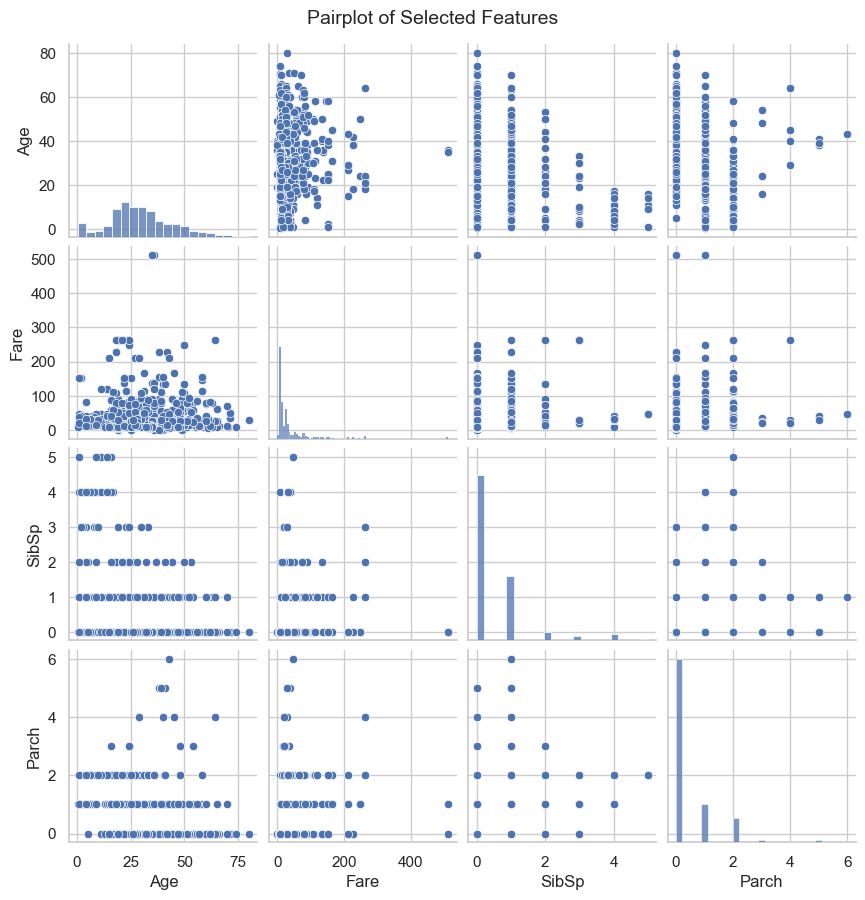

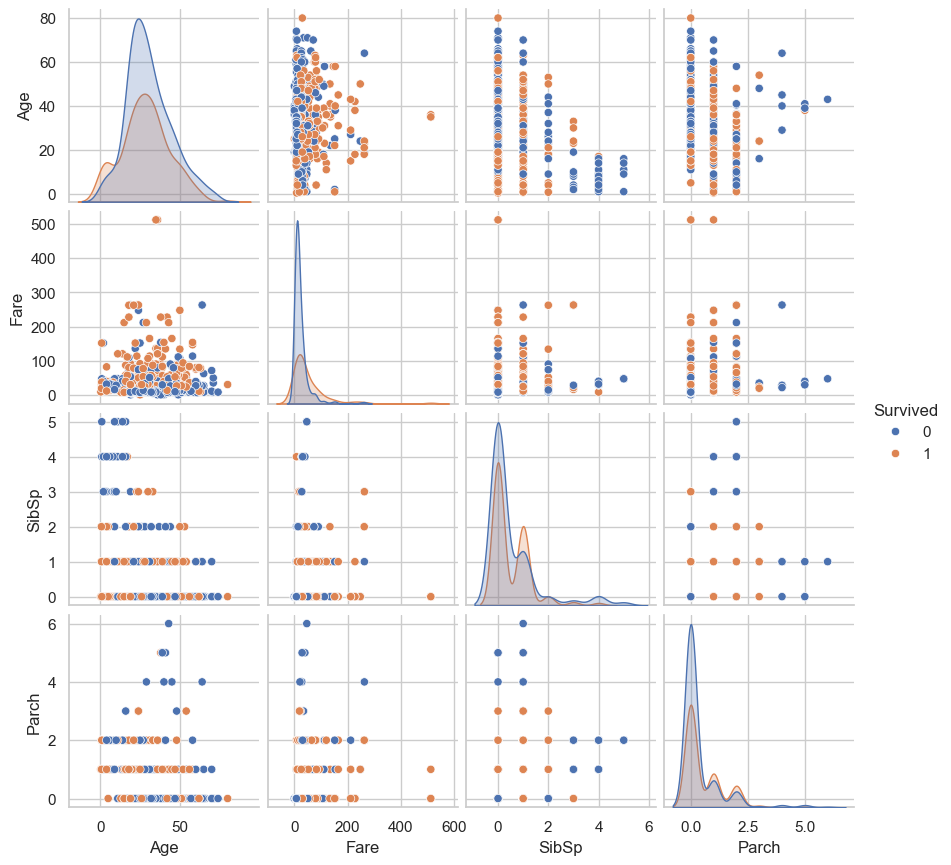

In [29]:
# 5.4 Pairplot (only meaningful columns)

# Step 1: Choose clean columns manually
# Example: selecting 'Age', 'Fare' if available
selected_cols = ['Age', 'Fare', 'SibSp', 'Parch']  # only important continuous/relatable columns

# Step 2: Drop missing values and plot
sns.pairplot(df[selected_cols].dropna(), height=2.2)
plt.suptitle('Pairplot of Selected Features', y=1.02, fontsize=14)
plt.show()
sns.pairplot(df[selected_cols + ['Survived']].dropna(), hue='Survived', height=2.2)


### 4. Pairplot of Selected Features (Age, Fare, SibSp, Parch)
- **Age and Fare:** No strong linear correlation; ages are scattered while fares show more skewness.
- **SibSp and Parch:** Positive correlation; passengers with siblings/spouses likely have parents/children too.
- **Distributions:** Age and Fare are right-skewed; SibSp and Parch mostly concentrated near zero.
- **Interaction:** No clear linear relationships, but some clusters visible.

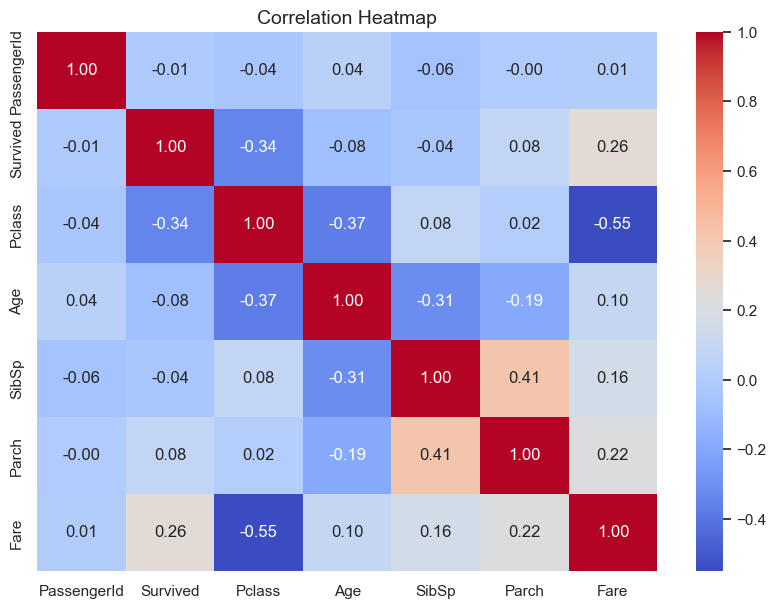

In [30]:
# 5.5 Correlation Heatmap (only numeric columns)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 7))
corr = numeric_df.corr()  # use only numeric data
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

# 6. Observations (You will write below each graph manually)


### 5. Correlation Heatmap
- **Survived & Pclass:** Negative correlation (-0.34), suggesting lower classes had lower survival.
- **Fare & Pclass:** Strong negative correlation (-0.55); higher classes paid more.
- **SibSp & Parch:** Moderate positive correlation (0.41); logical family presence relation.
- **Age:** Weak negative correlation with Pclass (-0.37) indicating younger passengers in lower classes.
- **Other correlations** are weak or negligible.

